## Als erstes die Framewerks importieren, die Daten laden und als Pandas DataFrames verwenden

In [1]:
import pandas as pd # für Datenimport
import numpy as np
import os # für Dateipfade
import sys
from datetime import datetime # um Datum und Uhrzeit im Überblick auszugeben
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dateinamen definieren und Dateipfade erstellen 
customers_file = "data/customers.csv"
customers_path = os.path.join(os.getcwd(), customers_file)
offers_file = "data/offers.csv"
offers_path = os.path.join(os.getcwd(), offers_file)
contacts_file = "data/contacts.csv"
contacts_path = os.path.join(os.getcwd(), contacts_file)

# Datensätze als Pandas-Dataframes laden 
customers_data = pd.read_csv(customers_path)
offers_data = pd.read_csv(offers_path)
contacts_data = pd.read_csv(contacts_path)

## DataFrames aufräumen

### Datensatz Contacts

In [3]:
# Die ersten beiden Spalten von contacts_data streichen
# musste erste Spalte der CSV anpassen um greifen zu können
contacts_data = contacts_data.drop(['Unnamed', 'Unnamed: 0'], axis=1) 

# contacts_data.index = contacts_data["person"] # person zum Index machen

### Datensatz Customers

In [4]:
# For-Schleife zum Vergleichen der Werte in den ersten beiden Spalten
# Können die ersten beiden Spalten gestrichen werden?
for index, row in customers_data.iterrows():
    if row['Unnamed: 0'] - row['Unnamed: 0.1'] != 0:
        print(f"Fehler in Zeile {index+1}: Wert von Spalte B ist ungleich Spalte A")

# Entscheidung dafür, die ersten beiden Spalten von customers_data zu streichen
# drop-Funktion gibt es ein neues DataFrame aus
customers_data = customers_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1) 

# customers_data.index = customers_data["cust_id"] # ID zum Index machen

# Datumsangaben in customers.csv zu einem datetime64 Object aus Pandas umwandeln, 
# um danach weitere Berechnungen machen zu können
customers_data["became_member_on"] = pd.to_datetime(customers_data["became_member_on"], format='%Y%m%d')

In [5]:
# Laut Frau Anderl ist in der Spalte "age" 118 lediglich ein Platzhalter für einen leeren Wert
# Um Durchschnitt, Median und co. nicht zu verfälschen: Umwandeln zu NaN
customers_data.loc[customers_data['age'] == 118, 'age'] = np.nan

In [6]:
customers_data[(customers_data["age"] == 118)]

,gender,age,cust_id,became_member_on,income


### Datensatz Offers

In [7]:
offers_data = offers_data.drop(["Unnamed"], axis=1)

## Überblick über die Datensätze

### Contacts

In [8]:
contacts_data.info()
contacts_data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280468 entries, 0 to 280467
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  280468 non-null  object
 1   event   280468 non-null  object
 2   time    280468 non-null  int64 
 3   type    280468 non-null  object
 4   val     280468 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.7+ MB


,person,event,time,type,val
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer_id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer_id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
95,1827da57bb924833a6f73c79b5f2bbc5,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
96,721eb06ac285463aa6e1184e0ea9b7f0,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
97,5f18c5754dc04baaa1267c823f877a85,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
98,d8567f1400d8486cb31c6abba64389ec,offer received,0,offer_id,ae264e3637204a6fb9bb56bc8210ddfd


In [9]:
contacts_data["time"].describe()

count    280468.000000
mean        368.652067
std         200.336421
min           0.000000
25%         192.000000
50%         408.000000
75%         534.000000
max         714.000000
Name: time, dtype: float64

In [10]:
contacts_data['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [11]:
contacts_data[~contacts_data.event.str.contains("transaction")]["event"].unique()

array(['offer received', 'offer viewed', 'offer completed'], dtype=object)

In [12]:
# Gib mir alle Zeilen aus, die NICHT "transaction" enthalten und zähle dann, wie oft welcher
# Wert in der Spalte "val" vorkommt
contacts_data[~contacts_data.event.str.contains("transaction")]["val"].value_counts()

fafdcd668e3743c1bb461111dcafc2a4    20241
2298d6c36e964ae4a3e7e9706d1fb8c2    20139
f19421c1d4aa40978ebb69ca19b0e20d    19131
4d5c57ea9a6940dd891ad53e9dbe8da0    18222
ae264e3637204a6fb9bb56bc8210ddfd    18062
9b98b8c7a33c4b65b9aebfe6a799e6d9    16202
2906b810c7d4411798c6938adc9daaa5    15767
0b1e1539f2cc45b7b9fa7c272da2e1d7    13751
Name: val, dtype: int64

In [13]:
# Nur Interaktionen mit Offers, keine Transactions!
contacts_data[~contacts_data.event.str.contains("transaction")].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141515 entries, 0 to 280461
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  141515 non-null  object
 1   event   141515 non-null  object
 2   time    141515 non-null  int64 
 3   type    141515 non-null  object
 4   val     141515 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.5+ MB


In [14]:
contacts_data[contacts_data.event.str.contains("offer received")]["val"].value_counts()

9b98b8c7a33c4b65b9aebfe6a799e6d9    7677
0b1e1539f2cc45b7b9fa7c272da2e1d7    7668
ae264e3637204a6fb9bb56bc8210ddfd    7658
2298d6c36e964ae4a3e7e9706d1fb8c2    7646
2906b810c7d4411798c6938adc9daaa5    7632
fafdcd668e3743c1bb461111dcafc2a4    7597
4d5c57ea9a6940dd891ad53e9dbe8da0    7593
f19421c1d4aa40978ebb69ca19b0e20d    7571
Name: val, dtype: int64

In [15]:
received_data = contacts_data[contacts_data.event.str.contains("offer received")]["val"].value_counts()
offers_data["received"] = offers_data["id"].map(received_data)

In [16]:
viewed_data = contacts_data[contacts_data.event.str.contains("offer viewed")]["val"].value_counts()
offers_data["viewed"] = offers_data["id"].map(viewed_data)

In [17]:
completed_data = contacts_data[contacts_data.event.str.contains("offer completed")]["val"].value_counts()
offers_data["completed"] = offers_data["id"].map(completed_data)

In [18]:
contacts_data[contacts_data.event.str.contains("transaction")].head(25)

,person,event,time,type,val
10114,02c083884c7d45b39cc68e1314fec56c,transaction,0,amount,0.8300000000000001
10116,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,amount,34.56
10118,54890f68699049c2a04d415abc25e717,transaction,0,amount,13.23
10128,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,amount,19.51
10129,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,amount,18.97
10134,629fc02d56414d91bca360decdfa9288,transaction,0,amount,33.9
10141,bbeb54e861614fc7b22a8844f72dca6c,transaction,0,amount,0.22
10142,a97e6f33219c432db82acfa0d19c602d,transaction,0,amount,18.59
10146,676506bad68e4161b9bbaffeb039626b,transaction,0,amount,18.01
10151,8f7dd3b2afe14c078eb4f6e6fe4ba97d,transaction,0,amount,19.11


In [19]:
offers_data

,reward,channels,difficulty,duration,offer_type,id,received,viewed,completed
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,7658,6716,3688
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,7593,7298,3331
2,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4171,4354
3,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,2663,3420
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,7646,7337,5156
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,7597,7327,5317
6,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,7571,7264,4296
7,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,7632,4118,4017


### Customers

In [20]:
customers_data.info()
customers_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  float64       
 2   cust_id           17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 664.2+ KB


,gender,age,cust_id,became_member_on,income
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


### Offers

In [21]:
offers_data.info()
offers_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      8 non-null      int64 
 1   channels    8 non-null      object
 2   difficulty  8 non-null      int64 
 3   duration    8 non-null      int64 
 4   offer_type  8 non-null      object
 5   id          8 non-null      object
 6   received    8 non-null      int64 
 7   viewed      8 non-null      int64 
 8   completed   8 non-null      int64 
dtypes: int64(6), object(3)
memory usage: 704.0+ bytes


,reward,channels,difficulty,duration,offer_type,id,received,viewed,completed
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,7658,6716,3688
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,7593,7298,3331
2,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,7677,4171,4354
3,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,7668,2663,3420
4,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,7646,7337,5156
5,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,7597,7327,5317
6,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,7571,7264,4296
7,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,7632,4118,4017


## Auswertung

Hier schauen wir uns wir uns an, wer wie oft kontaktiert wurde. 
- Wie ist der Durchschnitt?
- Wer sind die 10 Personen, die am häufigsten konktakiert wurden?

Weitergehend möglich: 
- Welche Aussage können wir über die top 10 Personen treffen?
- Welche Personen wurden noch nicht kontaktiert?

In [22]:
contacts_per_person = contacts_data['person'].value_counts()
contacts_per_person

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
d0a80415b84c4df4908b8403b19765e3    48
79d9d4f86aca4bed9290350fb43817c2    46
5e60c6aa3b834e44b822ea43a3efea26    46
                                    ..
b8f309e5c6b34d1b8158468dcf6cbdec     1
0b8684abe074418d9ec08eee090f1859     1
3389da76083a40d399af9642163b5cd3     1
df9fc9a86ca84ef5aedde8925d5838ba     1
bc0c484263b94b0896f20c5e4fdf3585     1
Name: person, Length: 16996, dtype: int64

In [23]:
customers_data["number of contacts"] = customers_data["cust_id"].map(contacts_per_person)
customers_data.head()

,gender,age,cust_id,became_member_on,income,number of contacts
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,21.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,8.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,16.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,8.0


In [24]:
customers_data["number of contacts"].describe()

count    16996.00000
mean        16.50200
std          6.99651
min          1.00000
25%         11.00000
50%         16.00000
75%         21.00000
max         51.00000
Name: number of contacts, dtype: float64

In [25]:
customers_data[customers_data["number of contacts"].isnull()]

,gender,age,cust_id,became_member_on,income,number of contacts
11367,F,53.0,96fa841c065d482bad03b19a7acfe95d,2017-10-21,94000.0,NaN
12124,M,53.0,f526f655ab8e48f2873dcda54a301afd,2017-09-19,57000.0,NaN
13853,M,39.0,fafcd6ee168140fbbb5da43be1d3daa7,2018-05-23,41000.0,NaN
14607,NaN,NaN,7ecfc592171f4844bdc05bdbb48d3847,2018-03-01,NaN,NaN


## Angebote 
Wir wollten uns jetzt anschauen, wie lange es dauert, bis Angebote eingelöst werden.

In [26]:
contacts_data.head()

,person,event,time,type,val
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer_id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer_id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [27]:

contacts_data.loc[contacts_data["event"] == "offer received"]["time"].unique()

array([  0, 168, 336, 408, 504, 576])

In [28]:
contacts_data.loc[contacts_data["event"] == "offer completed"]["time"].unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714])

In [29]:
contacts_data["event"].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

- Wie viele offers laufen ins Leere?
- Zeitpunkt Offer Completed minus Offer Received (evtl Offer Viewed)
- Abgleich mit der Maximal-Duration von dem jeweiligen Offer
- Wo kommen beim Zeitpunkt-Abgleich negative Werte?

In [30]:
contacts_data.head()

,person,event,time,type,val
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,offer_id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,offer_id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0


In [31]:
contacts_data.loc[contacts_data["event"] == "offer completed"]

,person,event,time,type,val
10117,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,0,offer_id,2906b810c7d4411798c6938adc9daaa5
10130,fe97aa22dd3e48c8b143116a8403dd52,offer completed,0,offer_id,fafdcd668e3743c1bb461111dcafc2a4
10135,629fc02d56414d91bca360decdfa9288,offer completed,0,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
10147,676506bad68e4161b9bbaffeb039626b,offer completed,0,offer_id,ae264e3637204a6fb9bb56bc8210ddfd
10152,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,0,offer_id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
280411,0c027f5f34dd4b9eba0a25785c611273,offer completed,714,offer_id,2298d6c36e964ae4a3e7e9706d1fb8c2
280431,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,714,offer_id,2298d6c36e964ae4a3e7e9706d1fb8c2
280440,b895c57e8cd047a8872ce02aa54759d6,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4
280443,8431c16f8e1d440880db371a68f82dd0,offer completed,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4


In [32]:
contacts_data.loc[contacts_data["person"] == "94de646f7b6041228ca7dec82adb97d2"]

,person,event,time,type,val
1843,94de646f7b6041228ca7dec82adb97d2,offer received,0,offer_id,f19421c1d4aa40978ebb69ca19b0e20d
13088,94de646f7b6041228ca7dec82adb97d2,offer viewed,6,offer_id,f19421c1d4aa40978ebb69ca19b0e20d
20877,94de646f7b6041228ca7dec82adb97d2,transaction,30,amount,7.41
20878,94de646f7b6041228ca7dec82adb97d2,offer completed,30,offer_id,f19421c1d4aa40978ebb69ca19b0e20d
37963,94de646f7b6041228ca7dec82adb97d2,transaction,102,amount,1.47
50573,94de646f7b6041228ca7dec82adb97d2,offer received,168,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
67460,94de646f7b6041228ca7dec82adb97d2,offer viewed,186,offer_id,9b98b8c7a33c4b65b9aebfe6a799e6d9
69651,94de646f7b6041228ca7dec82adb97d2,transaction,192,amount,2.62
73473,94de646f7b6041228ca7dec82adb97d2,transaction,204,amount,0.59
85292,94de646f7b6041228ca7dec82adb97d2,transaction,246,amount,2.2800000000000002


In [33]:
customers_data.head()

,gender,age,cust_id,became_member_on,income,number of contacts
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,21.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,8.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,16.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,8.0


In [34]:
'''
customers_data['completed_offer_id'] = np.nan

completed_contacts_data = contacts_data.loc[(contacts_data["event"] == "offer completed")]

for index, row in customers_data.iterrows():
    kunden_id = row['cust_id']
    kunden_interaktionen = completed_contacts_data.loc[(completed_contacts_data['person'] == kunden_id)]
    offers_interaktionen = kunden_interaktionen["val"].unique().tolist()
    customers_data.loc[customers_data['cust_id'] == kunden_id, 'interacted_offer_id'] = str(offers_interaktionen)

    # Filtere den contacts_data DataFrame nach dem aktuellen Kunden
    # kunden_interaktionen = contacts_data.loc[(contacts_data['person'] == kunden_id) & (contacts_data["event"] == "offer completed")]
    
    # Extrahiere die Offers, mit denen der Kunde interagiert hat
    # offers_interaktionen = kunden_interaktionen['offer_id'].unique().tolist()
    
    # Aktualisiere die Spalte "offer_interactions" im customers_data DataFrame für den aktuellen Kunden
    # customers_data.at[index, 'offer_interactions'] = str(offers_interaktionen)

# Optional: Konvertiere die Spalte "offer_interactions" in Tupelformat
# customers_data['offer_interactions'] = customers_data['offer_interactions'].apply(eval)

# Überprüfe das Ergebnis
# print(customers_data)
'''


'\ncustomers_data[\'completed_offer_id\'] = np.nan\n\ncompleted_contacts_data = contacts_data.loc[(contacts_data["event"] == "offer completed")]\n\nfor index, row in customers_data.iterrows():\n    kunden_id = row[\'cust_id\']\n    kunden_interaktionen = completed_contacts_data.loc[(completed_contacts_data[\'person\'] == kunden_id)]\n    offers_interaktionen = kunden_interaktionen["val"].unique().tolist()\n    customers_data.loc[customers_data[\'cust_id\'] == kunden_id, \'interacted_offer_id\'] = str(offers_interaktionen)\n\n    # Filtere den contacts_data DataFrame nach dem aktuellen Kunden\n    # kunden_interaktionen = contacts_data.loc[(contacts_data[\'person\'] == kunden_id) & (contacts_data["event"] == "offer completed")]\n    \n    # Extrahiere die Offers, mit denen der Kunde interagiert hat\n    # offers_interaktionen = kunden_interaktionen[\'offer_id\'].unique().tolist()\n    \n    # Aktualisiere die Spalte "offer_interactions" im customers_data DataFrame für den aktuellen Kund

In [35]:
customers_data['interacted_offer_id'] = np.nan
customers_data

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,21.0,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.0,NaN
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,8.0,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,16.0,NaN
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,8.0,NaN
...,...,...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,11.0,NaN
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,9.0,NaN
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,9.0,NaN
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,23.0,NaN


In [36]:

completed_contacts_data = contacts_data.loc[(contacts_data["event"] == "offer completed")]

# Gruppiere die Interaktionen nach Kunden und Offers und zähle die Anzahl der Interaktionen
interaktionen = completed_contacts_data.groupby(['person', 'event', 'time', "val"]).size().reset_index(name='count')
interaktionen

# Gruppiere die Interaktionen nach Kunden und erstelle ein Dictionary von Offers und deren Anzahl
offer_dict = interaktionen.groupby('person').apply(lambda x: dict(zip(x["val"], x['time']))).to_dict()

# Füge das Dictionary als neue Spalte "offer_interactions" zum customers_data DataFrame hinzu
customers_data["interacted_offer_id"] = customers_data['cust_id'].map(offer_dict)

# Überprüfe das Ergebnis
customers_data.head()

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,21.0,"{'2298d6c36e964ae4a3e7e9706d1fb8c2': 552, 'faf..."
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.0,{'9b98b8c7a33c4b65b9aebfe6a799e6d9': 528}
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,8.0,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,16.0,"{'9b98b8c7a33c4b65b9aebfe6a799e6d9': 132, 'ae2..."
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,8.0,NaN


In [37]:
contacts_data_without_transactions = contacts_data[~contacts_data.event.str.contains("transaction")]

In [38]:

# Initialisiere ein leeres Dictionary für die Kundeninteraktionen
offer_interactions = {}

# Iteriere über jede Zeile im contacts_data DataFrame
for index, row in contacts_data_without_transactions.iterrows():
    person = row['person']
    val = row['val']
    
    event = row['event']
    time = row['time']
    
    
    # Überprüfe, ob der Kunde bereits in offer_interactions existiert, falls nicht, füge ihn hinzu
    if person not in offer_interactions:
        offer_interactions[person] = {}
    
    
    # Überprüfe, ob das Angebot bereits in offer_interactions für den Kunden existiert, falls nicht, füge es hinzu
    if val not in offer_interactions[person]:
        offer_interactions[person][val] = {}
    
    # Speichere den Zeitwert unter dem entsprechenden Event im Nested Dictionary
    offer_interactions[person][val][event] = time

    
# Füge das Nested Dictionary als neue Spalte zum customers_data DataFrame hinzu
# customers_data['offer_interactions'] = customers_data['person'].map(offer_interactions)

# print(offer_interactions)



In [39]:
offer_interactions

{'78afa995795e4d85b5d9ceeca43f5fef': {'9b98b8c7a33c4b65b9aebfe6a799e6d9': {'offer received': 0,
   'offer viewed': 6,
   'offer completed': 132},
  'ae264e3637204a6fb9bb56bc8210ddfd': {'offer received': 408,
   'offer viewed': 408,
   'offer completed': 510},
  'f19421c1d4aa40978ebb69ca19b0e20d': {'offer received': 504,
   'offer completed': 510,
   'offer viewed': 582}},
 'a03223e636434f42ac4c3df47e8bac43': {'0b1e1539f2cc45b7b9fa7c272da2e1d7': {'offer received': 576,
   'offer viewed': 624}},
 'e2127556f4f64592b11af22de27a7932': {'2906b810c7d4411798c6938adc9daaa5': {'offer received': 0,
   'offer viewed': 18},
  '9b98b8c7a33c4b65b9aebfe6a799e6d9': {'offer received': 408,
   'offer viewed': 420,
   'offer completed': 522},
  'fafdcd668e3743c1bb461111dcafc2a4': {'offer received': 504,
   'offer viewed': 522,
   'offer completed': 522}},
 '8ec6ce2a7e7949b1bf142def7d0e0586': {'fafdcd668e3743c1bb461111dcafc2a4': {'offer received': 504,
   'offer viewed': 522},
  '4d5c57ea9a6940dd891ad53e9d

In [40]:
customers_data['offer_interactions'] = np.nan

In [41]:
customers_data['offer_interactions'] = customers_data['cust_id'].map(offer_interactions)

In [42]:
customers_data.loc[customers_data["cust_id"] == "94de646f7b6041228ca7dec82adb97d2"]

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id,offer_interactions
3108,M,27.0,94de646f7b6041228ca7dec82adb97d2,2014-01-26,33000.0,51.0,"{'f19421c1d4aa40978ebb69ca19b0e20d': 30, '9b98...",{'f19421c1d4aa40978ebb69ca19b0e20d': {'offer r...


In [43]:
customers_data[customers_data["offer_interactions"].isnull()]

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id,offer_interactions
186,M,82.0,c79da41557894c7eacc5c0156dc1f4dc,2016-12-31,87000.0,8.0,NaN,NaN
799,M,69.0,476c7dc6eaa04c3b8a9ea0aa4ccc814e,2015-03-28,64000.0,6.0,NaN,NaN
872,F,72.0,c6e579c6821c41d1a7a6a9cf936e91bb,2017-10-14,35000.0,4.0,NaN,NaN
898,M,45.0,d6434c375c2f4113b3735713e3c2789c,2017-07-27,52000.0,6.0,NaN,NaN
1118,M,56.0,a4e7d9d612f747b997fb9c174a1c5b45,2015-07-20,49000.0,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...
16152,M,30.0,2768c4eb6ffb4dd09c94f9fb04252d22,2016-07-19,51000.0,8.0,NaN,NaN
16155,F,72.0,45fa90832abf45f09b92fbb6826bf9ed,2017-07-11,77000.0,3.0,NaN,NaN
16221,M,25.0,48f9bfb155e64ccf94d613af903b9baa,2013-12-29,67000.0,10.0,NaN,NaN
16262,F,61.0,92bbabed0331408998d8c57ff2cdba68,2016-04-01,96000.0,7.0,NaN,NaN


## Schnelle Überprüfung

In [44]:
contacts_data.loc[contacts_data["person"] == "a03223e636434f42ac4c3df47e8bac43"]

,person,event,time,type,val
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
12686,a03223e636434f42ac4c3df47e8bac43,offer viewed,6,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
82006,a03223e636434f42ac4c3df47e8bac43,transaction,234,amount,1.09
88995,a03223e636434f42ac4c3df47e8bac43,transaction,264,amount,3.5
184144,a03223e636434f42ac4c3df47e8bac43,offer received,504,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
223638,a03223e636434f42ac4c3df47e8bac43,offer received,576,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7
251765,a03223e636434f42ac4c3df47e8bac43,transaction,612,amount,0.06
256256,a03223e636434f42ac4c3df47e8bac43,offer viewed,624,offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7


## Visualisierungen

In [45]:
sorted_customers_data = customers_data.sort_values('income')

In [46]:
sorted_customers_data.head()

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id,offer_interactions
3226,M,87.0,3bbce1ae7d1f43e098beda1a1c78913a,2017-08-29,30000.0,23.0,"{'f19421c1d4aa40978ebb69ca19b0e20d': 108, 'faf...",{'f19421c1d4aa40978ebb69ca19b0e20d': {'offer r...
7574,M,29.0,8b4fdc40b3fa43e0a3c392cc4048150e,2017-10-27,30000.0,15.0,{'fafdcd668e3743c1bb461111dcafc2a4': 378},{'9b98b8c7a33c4b65b9aebfe6a799e6d9': {'offer r...
2211,M,40.0,67b51df867b040ba8f97525907a8550c,2018-03-09,30000.0,10.0,NaN,{'fafdcd668e3743c1bb461111dcafc2a4': {'offer r...
12554,F,54.0,01772eae932447f9a853461a60820dc6,2017-07-13,30000.0,15.0,{'f19421c1d4aa40978ebb69ca19b0e20d': 420},{'f19421c1d4aa40978ebb69ca19b0e20d': {'offer r...
13412,M,43.0,a43970e00d2d4bf68ec23a67804097ea,2018-04-22,30000.0,11.0,{'fafdcd668e3743c1bb461111dcafc2a4': 156},{'fafdcd668e3743c1bb461111dcafc2a4': {'offer r...


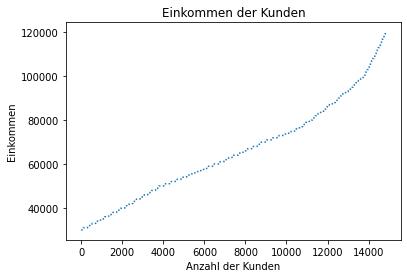

In [47]:
ypoints = np.array(sorted_customers_data['income'])

plt.plot(ypoints, linestyle = 'dotted')
plt.xlabel('Anzahl der Kunden')
plt.ylabel('Einkommen')
plt.title('Einkommen der Kunden')
plt.show()

<AxesSubplot:xlabel='became_member_on', ylabel='income'>

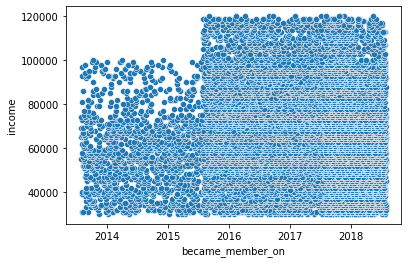

In [48]:
sns.scatterplot(data=sorted_customers_data, x='became_member_on', y='income')


In [49]:
sorted_customers_data.head()

,gender,age,cust_id,became_member_on,income,number of contacts,interacted_offer_id,offer_interactions
3226,M,87.0,3bbce1ae7d1f43e098beda1a1c78913a,2017-08-29,30000.0,23.0,"{'f19421c1d4aa40978ebb69ca19b0e20d': 108, 'faf...",{'f19421c1d4aa40978ebb69ca19b0e20d': {'offer r...
7574,M,29.0,8b4fdc40b3fa43e0a3c392cc4048150e,2017-10-27,30000.0,15.0,{'fafdcd668e3743c1bb461111dcafc2a4': 378},{'9b98b8c7a33c4b65b9aebfe6a799e6d9': {'offer r...
2211,M,40.0,67b51df867b040ba8f97525907a8550c,2018-03-09,30000.0,10.0,NaN,{'fafdcd668e3743c1bb461111dcafc2a4': {'offer r...
12554,F,54.0,01772eae932447f9a853461a60820dc6,2017-07-13,30000.0,15.0,{'f19421c1d4aa40978ebb69ca19b0e20d': 420},{'f19421c1d4aa40978ebb69ca19b0e20d': {'offer r...
13412,M,43.0,a43970e00d2d4bf68ec23a67804097ea,2018-04-22,30000.0,11.0,{'fafdcd668e3743c1bb461111dcafc2a4': 156},{'fafdcd668e3743c1bb461111dcafc2a4': {'offer r...


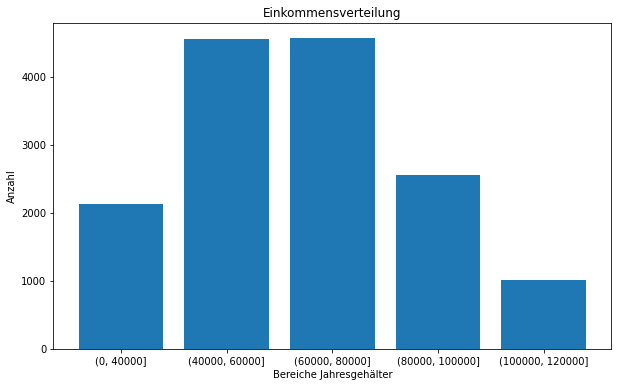

In [50]:
plt.figure(figsize=(10, 6))

# Definiere die Einkommensbereiche
income_ranges = [0, 40000, 60000, 80000, 100000, 120000]

# Erstelle die Einkommensbereichs-Spalte im customers_data DataFrame
customers_data['income_range'] = pd.cut(customers_data['income'], bins=income_ranges)

# Zähle die Anzahl der Kunden in jedem Einkommensbereich
income_counts = customers_data['income_range'].value_counts().sort_index()

# Erstelle das Balkendiagramm
plt.bar(income_counts.index.astype(str), income_counts.values)

# Beschrifte die Achsen und den Titel
plt.xlabel('Bereiche Jahresgehälter')
plt.ylabel('Anzahl')
plt.title('Einkommensverteilung')

# Zeige den Graphen an
plt.show()

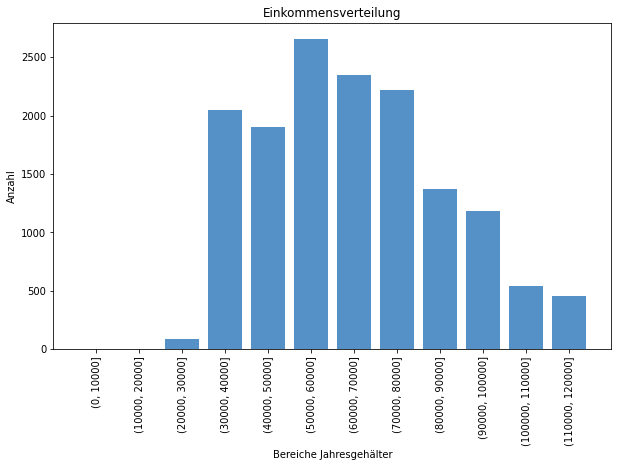

In [56]:
plt.figure(figsize=(10, 6))

# Definiere die Einkommensbereiche
income_ranges = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]

# Erstelle die Einkommensbereichs-Spalte im customers_data DataFrame
customers_data['income_range'] = pd.cut(customers_data['income'], bins=income_ranges)

# Zähle die Anzahl der Kunden in jedem Einkommensbereich
income_counts = customers_data['income_range'].value_counts().sort_index()

# Erstelle das Balkendiagramm
plt.bar(income_counts.index.astype(str), income_counts.values, color="#5591c6")

# Beschrifte die Achsen und den Titel
plt.xlabel('Bereiche Jahresgehälter')
plt.ylabel('Anzahl')
plt.title('Einkommensverteilung')

plt.xticks(rotation=90)

# Zeige den Graphen an
plt.show()

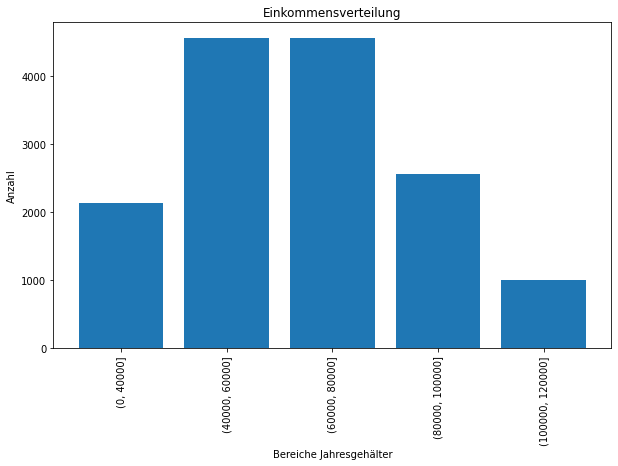

In [52]:
plt.figure(figsize=(10, 6))

# Definiere die Einkommensbereiche
transaction_ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

# Erstelle die Einkommensbereichs-Spalte im customers_data DataFrame
contacts_data['income_range'] = pd.cut(customers_data['income'], bins=income_ranges)

# Zähle die Anzahl der Kunden in jedem Einkommensbereich
income_counts = customers_data['income_range'].value_counts().sort_index()

# Erstelle das Balkendiagramm
plt.bar(income_counts.index.astype(str), income_counts.values)

# Beschrifte die Achsen und den Titel
plt.xlabel('Bereiche Jahresgehälter')
plt.ylabel('Anzahl')
plt.title('Einkommensverteilung')

plt.xticks(rotation=90)

# Zeige den Graphen an
plt.show()

In [ ]:
customers_data['income'].describe()